* [Coronavirus-Dataset | Kaggle](https://www.kaggle.com/kimjihoo/coronavirusdataset)

```
1. patient 데이터셋 정보
- id: 확진자의 id (n번째 확진자)
- sex: 성별
- birth_year: 출생 연도
- country: 국적
- region: 주 활동 지역 (광역시/도 단위)
- group: 특정 집단 관련
- infection_reason: 감염 경로
- infection_order: 감염 차수 (n차 감염)
- infected_by: 해당 확진자의 감염원 id
- contact_number: 접촉자 수
- confirmed_date: 확진 일자
- released_date: 퇴원 일자 (격리 해제 일자)
- deceased_date: 사망 일자
- state: 상태

2. route 데이터셋 정보
- id: 확진자의 id (n번째 확진자)
- date: 일자
- province: 특별시/광역시/도
- city: 시/군/구
- visit: 방문한 장소 (종류)
- latitude: 위도
- longitude: 경도

3. time 데이터셋 정보
- date: 일자
- acc_test: 누적 검사 수 (진행 중인 검사 포함)
- acc_negative: 누적 음성 결과 수
- acc_confirmed: 누적 양성 결과 수 (확진)
- acc_released: 누적 격리 해제 수
- acc_deceased: 누적 사망 수
- new_test: 신규 검사 수
- new_negative: 신규 음성 결과 수
- new_confirmed: 신규 양성 결과 수 (확진)
- new_released: 신규 격리 해제 수
```

## 라이브러리 로드

In [1]:
import pandas as pd

### 데이터셋 불러오기

In [2]:
df = pd.read_csv('data/patient.csv')
df.shape

(4812, 14)

In [3]:
# head 로 미리보기
df.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [4]:
# tail 로 미리보기
df.tail()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
4807,4808,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated
4808,4809,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated
4809,4810,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated
4810,4811,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated
4811,4812,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-02,NaN,NaN,isolated


In [5]:
# info로 정보보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4812 non-null   int64  
 1   sex               383 non-null    object 
 2   birth_year        370 non-null    float64
 3   country           4812 non-null   object 
 4   region            371 non-null    object 
 5   group             81 non-null     object 
 6   infection_reason  140 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       70 non-null     float64
 9   contact_number    47 non-null     float64
 10  confirmed_date    4812 non-null   object 
 11  released_date     32 non-null     object 
 12  deceased_date     20 non-null     object 
 13  state             4812 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 526.4+ KB


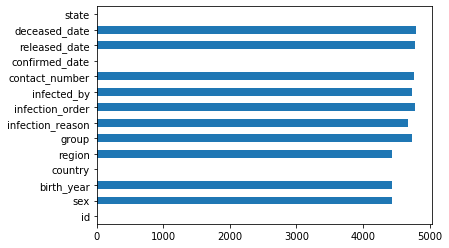

In [6]:
# 결측치 수 보기
df.isnull().sum().plot.barh()

## 컬럼정보 만들기
* 영문으로 된 컬럼명을 한글로 표현하고자 할 때 사용합니다.
* text 데이터로 dict 형태의 데이터 만들기

In [10]:
cols_text = """- id: 확진자의 id (n번째 확진자)
- sex: 성별
- birth_year: 출생 연도
- country: 국적
- region: 주 활동 지역 (광역시/도 단위)
- group: 특정 집단 관련
- infection_reason: 감염 경로
- infection_order: 감염 차수 (n차 감염)
- infected_by: 해당 확진자의 감염원 id
- contact_number: 접촉자 수
- confirmed_date: 확진 일자
- released_date: 퇴원 일자 (격리 해제 일자)
- deceased_date: 사망 일자
- state: 상태"""
cols_text

'- id: 확진자의 id (n번째 확진자)\n- sex: 성별\n- birth_year: 출생 연도\n- country: 국적\n- region: 주 활동 지역 (광역시/도 단위)\n- group: 특정 집단 관련\n- infection_reason: 감염 경로\n- infection_order: 감염 차수 (n차 감염)\n- infected_by: 해당 확진자의 감염원 id\n- contact_number: 접촉자 수\n- confirmed_date: 확진 일자\n- released_date: 퇴원 일자 (격리 해제 일자)\n- deceased_date: 사망 일자\n- state: 상태'

In [11]:
cols_lst = cols_text.replace("- ","").split("\n")
dictionary ={}

for i in cols_lst:
	dictionary[i.split(':')[0]] = i.split(":")[1].lstrip()

In [13]:
dictionary

{'id': '확진자의 id (n번째 확진자)',
 'sex': '성별',
 'birth_year': '출생 연도',
 'country': '국적',
 'region': '주 활동 지역 (광역시/도 단위)',
 'group': '특정 집단 관련',
 'infection_reason': '감염 경로',
 'infection_order': '감염 차수 (n차 감염)',
 'infected_by': '해당 확진자의 감염원 id',
 'contact_number': '접촉자 수',
 'confirmed_date': '확진 일자',
 'released_date': '퇴원 일자 (격리 해제 일자)',
 'deceased_date': '사망 일자',
 'state': '상태'}

In [14]:
dictionary['confirmed_date']

'확진 일자'

In [8]:
# dict 형태로 만들기 위해 전처리 하기
{'key':'value',}
cols_dict = cols_text.replace(': ', '":"').replace('\n', '",').replace('- ','"')
cols_dict = '{' + cols_dict + '"}'
cols_dict

'{"id":"확진자의 id (n번째 확진자)","sex":"성별","birth_year":"출생 연도","country":"국적","region":"주 활동 지역 (광역시/도 단위)","group":"특정 집단 관련","infection_reason":"감염 경로","infection_order":"감염 차수 (n차 감염)","infected_by":"해당 확진자의 감염원 id","contact_number":"접촉자 수","confirmed_date":"확진 일자","released_date":"퇴원 일자 (격리 해제 일자)","deceased_date":"사망 일자","state":"상태"}'

In [9]:
# dict는 {}로 감싸져 있기 때문에 {} 로 감싸고 eval로 dict 형태로 만듭니다.
cols = eval(cols_dict)
cols

{'id': '확진자의 id (n번째 확진자)',
 'sex': '성별',
 'birth_year': '출생 연도',
 'country': '국적',
 'region': '주 활동 지역 (광역시/도 단위)',
 'group': '특정 집단 관련',
 'infection_reason': '감염 경로',
 'infection_order': '감염 차수 (n차 감염)',
 'infected_by': '해당 확진자의 감염원 id',
 'contact_number': '접촉자 수',
 'confirmed_date': '확진 일자',
 'released_date': '퇴원 일자 (격리 해제 일자)',
 'deceased_date': '사망 일자',
 'state': '상태'}

In [15]:
# 'confirmed_date' 확진 일자 컬럼을 가져와서 전처리가 잘 되었는지 봅니다.

cols['confirmed_date']

'확진 일자'

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Win
sns.set(font="Malgun Gothic")
# 마이너스 폰트 깨지는 문제
plt.rc('axes', unicode_minus=False)

## 일자별 확진자와 누적확진자
### countplot 사용하기

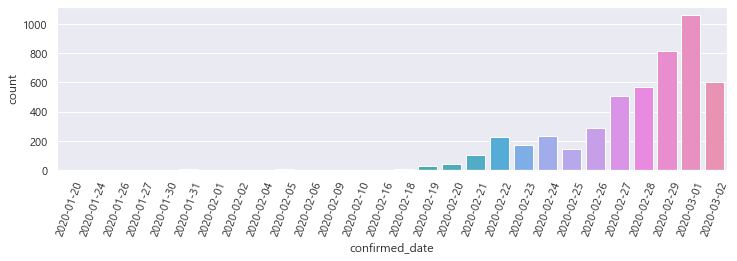

In [17]:
# seaborn 의 countplot 으로 시각화

plt.figure(figsize=(12,3))
plt.xticks(rotation=70)
sns.countplot(data=df, x='confirmed_date')

### 날짜표현을 다르게 하기

In [18]:
#  확진일자 컬럼 만들기 confirmed_date 로 월과 일만 분리합니다.
df['확진일자'] = df['confirmed_date'].str.replace('2020-','')

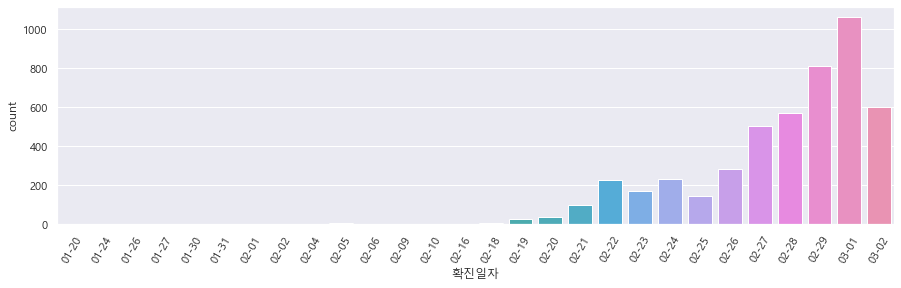

In [19]:
# countplot 으로 확진일자의 빈도수를 구합니다.
plt.figure(figsize=(15,4))
plt.xticks(rotation=60)
sns.countplot(data=df, x='확진일자')

### value_counts를 이용해서 일자별 확진자와 누적확진자 수 구하기

In [24]:
# value_counts 를 이용해서 일자별 확진자와 누적확진자 수를 구합니다.
df['confirmed_date'].value_counts()

2020-03-01    1062
2020-02-29     813
2020-03-02     600
2020-02-28     571
2020-02-27     505
2020-02-26     285
2020-02-24     231
2020-02-22     229
2020-02-23     169
2020-02-25     143
2020-02-21     100
2020-02-20      39
2020-02-19      26
2020-02-18       9
2020-02-05       5
2020-01-31       4
2020-02-09       3
2020-02-06       3
2020-02-02       3
2020-01-30       3
2020-02-16       2
2020-01-26       1
2020-01-27       1
2020-01-20       1
2020-01-24       1
2020-02-01       1
2020-02-04       1
2020-02-10       1
Name: confirmed_date, dtype: int64

### value_counts 로 구한 결과 시각화 하기

In [ ]:
# pointplot, barplot 으로 일자별 sum, count 값을 시각화 합니다.



### 로그가 없는 날짜도 0으로 값을 채워주기
* 확진자가 없는 날짜는 날짜컬럼에 없습니다. 그래서 날짜별로 변동을 보기 위해 1월 20일부터 마지막 로그 사이의 비어있는 날짜를 채웁니다.

In [ ]:
# 컬럼명을 보기위해 데이터를 미리보기 합니다.



In [ ]:
# loc[행, 열] 로 데이터에 접근할 수 있습니다. 
# 데이터프레임의 첫번째 날짜는 first_day 에 마지막 날짜는 last_day 에 담습니다.


In [ ]:
# pd.date_range 를 통해 시작하는 날짜부터 끝나는 날짜까지의 DatetimeIndex 를 만들고 days 라는 변수에 저장합니다.
days

In [ ]:
# days 변수의 값으로 "연월일" 이라는 컬럼이름을 갖는 데이터프레임을 만듭니다.



In [ ]:
# days 의 데이터프레임 정보를 봅니다.


In [ ]:
# df의 정보를 다시 봅니다. 두 데이터를 어떻게 merge 하면 좋을지 생각해 봅니다.



## 일자별, 성별 확진자 수
* groupby 로 데이터를 그룹화하여 성별에 따라 일자별 확진자 수를 구합니다.

In [ ]:
# groupby 로 데이터를 그룹화하여 성별에 따라 일자별 확진자 수를 구합니다.



In [ ]:
# merge를 위해 연월일 컬럼을 str 형태로 변경합니다.



### merge 로 모든 날짜에 대한 데이터 만들기

In [ ]:
# days_all 이라는 변수에 연월일 데이터를 담습니다.



### 성별 누적 확진자 수 구하기
* cumsum 을 사용해 누적 확진자의 수를 구합니다.

In [ ]:
# 성별 누적 확진자 수 구하기
# female_cum, male_cum 변수에 담습니다.



### 성별 누적 확진 수
* Pandas 의 plot은 x축에 인덱스의 값을 y축에 컬럼의 값을 사용합니다.

In [ ]:
# 성별 확진 누적수를 판다스로 시각화 합니다.



In [ ]:
# 날짜를 x축에 나타내고자 하면 set_index 를 통해 연월일 컬럼을 인덱스로 지정합니다.



## 연령대별 확진자 보기

In [ ]:
# 연령대에 결측치가 없는 데이터만 따로 df_age라는 변수에 담습니다.



In [ ]:
# birth_year를 수치데이터로 변환합니다.
# 나이를 계산해서 age 컬럼에 담습니다.



In [ ]:
# countplot 으로 연령대 데이터를 시각화 합니다.



In [ ]:
# distplot 으로 연령대의 분포를 봅니다.



## 접촉자 수

In [ ]:
# kdeplot 으로 접촉차 수를 구합니다.



In [ ]:
# 전체 접촉자수의 누적을 구합니다.



In [ ]:
# 100명이상 접촉자가 있는 데이터만 따로 봅니다.



## 상태값 보기

In [ ]:
# 격리해제, 격리, 사망 상태에 따라 state 를 countplot 으로 시각화 합니다.



In [ ]:
# state 값을 value_counts 로 구해봅니다.



## 사망자 연령대 보기

In [ ]:
cols["deceased_date"]

In [ ]:
# countplot 으로 일자별 데이터를 구합니다.



In [ ]:
# 연령대 컬럼 만들기



In [ ]:
# deceased 라는 변수에 데이터프레임 따로 저장하기 
# age 컬럼 만들기



### 날짜별 사망자 평균 연령

In [ ]:
# barplot 으로 사망자 연령대의 평균을 봅니다.



In [ ]:
# distplot 으로 사망자 연령대의 분포를 봅니다.



## 감염집단 보기

In [ ]:
# group 별 value_counts 구하기
df["group"].value_counts()

In [ ]:
# infection_reason 별 value_counts 구하기



In [ ]:
cols["region"]

In [ ]:
# region 별 value_counts 구하고 시각화 해보기


